In [106]:
# 학습 데이터 생성

import torch

x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

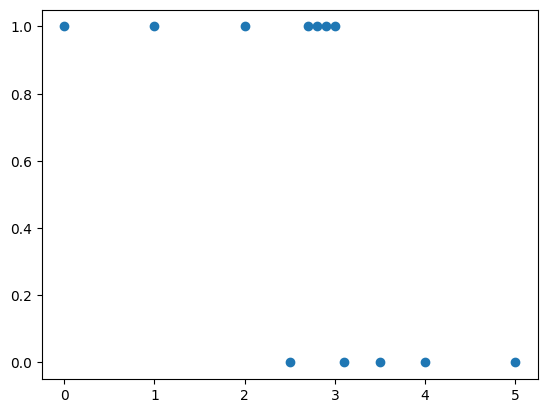

In [107]:
import matplotlib.pyplot as plt

plt.scatter(x_train, y_train)
plt.show()

In [108]:
# 가설을 세우기 위한 W, b 초기화

w = torch.randn((1, 1))
b = torch.randn(1)

lr = 1.0

print(w)
print(b)

for epoch in range(1001):
    w.requires_grad_(True) # w에 대하여 기울기 계산을 할 것을 의미
    b.requires_grad_(True) # b에 대하여 기울기 계산을 할 것을 의미

    h = torch.sigmoid(torch.mm(x_train, w) + b)
    cost = torch.mean(-y_train * torch.log(h) - (1 - y_train) * torch.log(1 - h))

    cost.backward() # 기울기 계산 

    with torch.no_grad():
        w = w - lr * w.grad
        b = b - lr * b.grad

        if epoch % 100 == 0:
            print(w.item(), b.item(), cost.item())


tensor([[0.6743]])
tensor([1.4787])
-0.7554157376289368 1.1109293699264526 1.6847258806228638
-1.5163540840148926 4.606955051422119 0.4162251055240631
-1.9353169202804565 5.88577938079834 0.3974713981151581
-2.1992299556732178 6.684780597686768 0.3902571499347687
-2.385467290878296 7.2462005615234375 0.38671207427978516
-2.524400472640991 7.663904666900635 0.384753942489624
-2.6315221786499023 7.985383033752441 0.38359537720680237
-2.715930700302124 8.238368034362793 0.38287845253944397
-2.7834632396698 8.44057559967041 0.3824208080768585
-2.8381004333496094 8.604049682617188 0.3821216821670532
-2.8826794624328613 8.73735237121582 0.38192275166511536


In [109]:
# BCE 구하기 (바이너리 크로스 엔트로피 - 코스트)
# C = - y * log(h) - (1-y) * log(1 - h)
# cost = mean(C)

h = torch.sigmoid(torch.mm(x_train, w) + b)
C = -y_train * torch.log(h) - (1 - y_train) * torch.log(1 - h)
cost = torch.mean(C)

print(cost)

tensor(0.3819)


In [110]:
with torch.no_grad():
    x_test = torch.tensor([[4.5], [1.1], [10.2]])
    y_test = torch.sigmoid(torch.mm(x_test, w) + b)

    # y_test[y_test > 0.5] = 1
    # y_test[y_test <= 0.5] = 0

    # print(y_test)

    print(torch.round(y_test))

tensor([[0.],
        [1.],
        [0.]])


tensor([[0.0000],
        [0.0505],
        [0.1010],
        [0.1515],
        [0.2020],
        [0.2525],
        [0.3030],
        [0.3535],
        [0.4040],
        [0.4545],
        [0.5051],
        [0.5556],
        [0.6061],
        [0.6566],
        [0.7071],
        [0.7576],
        [0.8081],
        [0.8586],
        [0.9091],
        [0.9596],
        [1.0101],
        [1.0606],
        [1.1111],
        [1.1616],
        [1.2121],
        [1.2626],
        [1.3131],
        [1.3636],
        [1.4141],
        [1.4646],
        [1.5152],
        [1.5657],
        [1.6162],
        [1.6667],
        [1.7172],
        [1.7677],
        [1.8182],
        [1.8687],
        [1.9192],
        [1.9697],
        [2.0202],
        [2.0707],
        [2.1212],
        [2.1717],
        [2.2222],
        [2.2727],
        [2.3232],
        [2.3737],
        [2.4242],
        [2.4747],
        [2.5253],
        [2.5758],
        [2.6263],
        [2.6768],
        [2.7273],
        [2

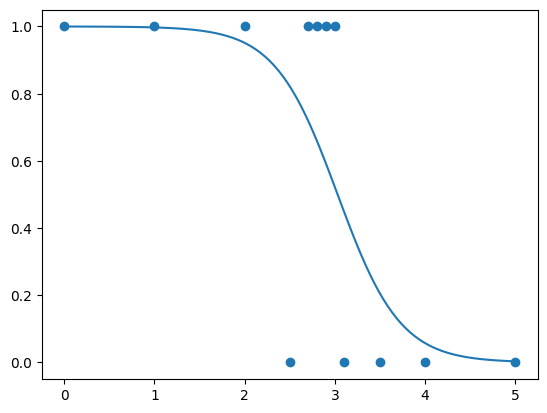

In [111]:
# x_tmp = torch.linspace(0, 5, 100)
# x_tmp = torch.linspace(0, 5, 100).view(len(x_tmp), 1)
x_tmp = torch.linspace(0, 5, 100).unsqueeze(1)
y_tmp = torch.sigmoid(torch.mm(x_tmp, w) + b)

print(x_tmp)

plt.plot(x_tmp, y_tmp)
plt.scatter(x_train, y_train)
plt.show()

In [112]:
# 기존 optimizer를 가져와서 사용해보기

# 가설을 세우기 위한 W, b 초기화

w = torch.randn((1, 1), requires_grad = True)
b = torch.randn(1, requires_grad = True)

optim = torch.optim.SGD([w, b], lr = 1.0) # 메모리는 그대로 참조하고 w, b의 내부 값만 변경하는 특징을 가짐

for epoch in range(1001):
    h = torch.sigmoid(torch.mm(x_train, w) + b)
    cost = torch.mean(-y_train * torch.log(h) - (1 - y_train) * torch.log(1 - h))

    # with torch.no_grad():
    #     w.grad = torch.FloatTensor([[0]])
    #     b.grad = torch.FloatTensor([[0]])

    optim.zero_grad() # 기울기값 초기화 <- 초기화를 안하면 epoch 반복을 할떄 기존 누적된 값이 사용됨

    cost.backward() # 기울기 계산 
    optim.step() # 파라미터 업데이트 (w, b)

    if epoch % 100 == 0:
        print(w.item(), b.item(), cost.item())




-0.3751455545425415 -0.1726825088262558 1.707605242729187
-1.4442462921142578 4.385268688201904 0.42067453265190125
-1.8945173025131226 5.761849880218506 0.3988581597805023
-2.1716954708099365 6.601617336273193 0.39088109135627747
-2.365421772003174 7.185857772827148 0.38704049587249756
-2.5091795921325684 7.618185997009277 0.3849424421787262
-2.619652509689331 7.949785232543945 0.38370975852012634
-2.7065036296844482 8.210127830505371 0.38295039534568787
-2.7758772373199463 8.417869567871094 0.3824671804904938
-2.8319358825683594 8.585610389709473 0.38215234875679016
-2.8776345252990723 8.722270965576172 0.3819434344768524


In [114]:
# sklearn을 이용한 logistic regression

from sklearn.linear_model import LogisticRegression

x_train = [[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]]
y_train = [1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1]

model = LogisticRegression(penalty = 'none')
model.fit(x_train, y_train)

# model.coef_ <- w에 해당하는 값
# model.intercept_ <- b에 해당하는 값
print(model.coef_, model.intercept_)

x_test = [[4.5], [1.1]]
y_test = model.predict(x_test)

print(y_test)

[[-3.10385806]] [9.39776831]
[0 1]
